In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Puliamo il file Comuni

comuni_raw = pd.read_csv('./Materiali/Comuni_python.csv',delimiter=';',skiprows=7).iloc[:-1]

#Togliamo le colonne vuota(solo 1 in questo caso)
#comuni= comuni.dropna(how='all',axis='columns')
comuni = comuni_raw.drop(['Unnamed: 1'],axis=1)

#Togliamo le righe vuote e i duplicati
comuni= comuni.dropna(how='all')
comuni = comuni.drop_duplicates()

#Sistemiamo la colonna Regioni 
comuni['Regione'] =comuni['Regione'].str.title()

#Trasformiamo la colonna Regioni in num int
comuni['Popolazione2011'] = comuni['Popolazione2011'].astype(int)

print(comuni)

In [3]:
comuni.to_csv("comuni_python_cleaned.csv")

In [ ]:
#Puliamo il file province

province_raw=pd.read_csv('./Materiali/covid19_italy_province _python.csv')

#Puliamo le colonne
province= province_raw.dropna(how='all')
province = province.drop_duplicates()

#Togliamo la colonna SNo
province = province.drop(['SNo'],axis=1)

#Togliamo l'orario nella colonna Date
province['Date'] = pd.to_datetime(province['Date'])
province['Date'] = province['Date'].dt.date


print(province)



In [ ]:
#Puliamo il file regioni

region_raw=pd.read_csv('./Materiali/covid19_italy_region _python.csv')

#Puliamo le colonne
region= region_raw.dropna(how='all')
region = region.drop_duplicates()

#Togliamo la colonna SNo
region = region.drop(['SNo'],axis=1)

#Togliamo l'orario nella colonna Date
region['Date'] = pd.to_datetime(region['Date'])
region['Date'] = region['Date'].dt.date

region = region.fillna(0)

# Converti la colonna "TestsPerformed" da float a int
region['TestsPerformed'] = region['TestsPerformed'].astype(int)
region["TotalPositiveCases"]=region['TotalPositiveCases'].astype(int)

print(region)

In [ ]:
print(region.describe())

In [ ]:
####### 1. Guariti e Deceduti per ogni regione:

group_by_region=region.groupby("RegionName").agg({"Deaths":"sum","Recovered":"sum"}).reset_index()
print(group_by_region[["RegionName","Deaths","Recovered"]])
#Plot dei morti e guariti per regione
plt.figure(figsize=(12,6))
bar_width = 0.4
index = np.arange(len(group_by_region['RegionName']))
bars1=plt.bar(index, group_by_region['Deaths'], bar_width, label='Deaths')
bars2=plt.bar(index + bar_width, group_by_region['Recovered'], bar_width, label='Recovered')
plt.xlabel('Region')
plt.ylabel('Number')
plt.title('Total Deaths and Recovered Cases per Region')
def annotate_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom',rotation=90)
annotate_bars(bars1)
annotate_bars(bars2)
plt.legend()
plt.xticks(index + bar_width / 2, group_by_region['RegionName'], rotation=90)
plt.show()


In [ ]:
###### 2.Del totale TotalPositiveCases, vogliamo vedere quanti HospitalizedPatients,IntensiveCarePatients e HomeConfinement
# Filtra per la data desiderata (ultima data, che ci da un possibile il totale)

region['Date'] = pd.to_datetime(region['Date'])
df_selected_date = region[region['Date'] == '2020-12-06']
df_selected = df_selected_date[['HospitalizedPatients', 'IntensiveCarePatients', 'HomeConfinement']]
totals = df_selected.sum()
# Grafico a torta corrispondente
labels = ['Ricoverati', 'Terapia intensiva', 'Isolamento']
sizes = totals.values
colors=['lightblue', 'lightcoral', 'lightgreen']
explode = (0.4, 0.6, 0)  # Espandiamo la prima fetta (Hospitalized Patients)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.axis('equal')  # Garantisce che il grafico a torta sia disegnato come un cerchio
plt.title('Distribuzione dei Casi COVID-19')
plt.show()

In [ ]:
###### 3. Distribuzione stagionale dei casi COVID-19

region['Date'] = pd.to_datetime(region['Date'])
region.set_index('Date', inplace=True)
# Calcolo dei totali
OspedalizzatiTotITA = region["HospitalizedPatients"].sum()
TerapiaIntensivaTotITA = region["IntensiveCarePatients"].sum()
ConfinatiACasaTotITA =region["HomeConfinement"].sum()
# Calcolo dei totali stagionali
OspedalizzatiStagionaliITA = region.resample("Q")["HospitalizedPatients"].mean()
TerapiaIntensivaStagionaliITA = region.resample("Q")["IntensiveCarePatients"].mean()
ConfinatiACasaStagionaliITA = region.resample("Q")["HomeConfinement"].mean()


# Creazione di un DataFrame per i totali
PazientiPositivi = pd.DataFrame({
    'Ospedalizzati': [OspedalizzatiTotITA],
    'TerapiaIntensiva': [TerapiaIntensivaTotITA],
    'Isolamento domiciliare': [ConfinatiACasaTotITA]
}, index=['Total'])
# Creazione di un DataFrame per i totali stagionali
PazientiPositiviStagionali = pd.DataFrame({
    'Ospedalizzati': OspedalizzatiStagionaliITA,
    'Terapia Intensiva': TerapiaIntensivaStagionaliITA,
    'Isolamento domiciliare': ConfinatiACasaStagionaliITA
})
# Grafico a torta corrispondente
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12, 10))
fig.suptitle('Distribuzione Stagionale dei Casi COVID-19', fontsize=16, fontweight='bold')


def annotate_pie(ax, labels, sizes,explode):
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'],explode=explode)
    

explode = (0.1, 0.1, 0)  # Espandi le prime due fette (Ospedalizzati e Terapia) rispetto a Isolamento

annotate_pie(ax1, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[0],explode)
ax1.set_title('Trimestre Invernale')
annotate_pie(ax2, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[1],explode)
ax2.set_title('Trimestre Primaverile')
annotate_pie(ax3, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[2],explode)
ax3.set_title('Trimestre Estivo')
annotate_pie(ax4, PazientiPositiviStagionali.columns, PazientiPositiviStagionali.iloc[3],explode)
ax4.set_title('Trimestre Autunnale')

total_text = f'Totale Casi Positivi: {OspedalizzatiTotITA}'
fig.text(0.5, 0.1, total_text, ha='center', va='center', fontsize=12, color='black')

fig.legend(labels=PazientiPositiviStagionali.columns, loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
###### 4. Andamento mensile dei nuovi casi positivi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
region.groupby('Date')['NewPositiveCases'].sum().plot(marker='.', linestyle='-', color='b', label='Nuovi Casi Positivi')
plt.title('Andamento dei Nuovi Casi Positivi', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Nuovi Casi Positivi', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
##### 5. Calcola il tasso di guarigione  e il tasso di mortalità nel tempo:

# Calcola il tasso di guarigione nel tempo
region['RecoveryRate'] = region['Recovered'] / region['TotalPositiveCases']
recovery_rate = region.groupby('Date')['RecoveryRate'].mean()

# Calcola il tasso di mortalità nel tempo
region['MortalityRate'] = region['Deaths'] / region['TotalPositiveCases']
mortality_rate = region.groupby('Date')['MortalityRate'].mean()

# Crea il grafico
plt.figure(figsize=(10, 6))

# Plot del tasso di guarigione
plt.plot(recovery_rate.index, recovery_rate, label='Tasso di guarigione', color='green',linewidth=3)

# Plot del tasso di mortalità
plt.plot(mortality_rate.index, mortality_rate, label='Tasso di mortalità', color='red',linewidth=3)

# Titolo e etichette degli assi
plt.title('Tasso di guarigione e tasso di mortalità nel tempo')
plt.xlabel('Data')
plt.ylabel('Tasso')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.tight_layout()
plt.show()


In [ ]:
##### 6. Le prime 15 province con più positivi:

# Raggruppa i dati per RegionName e calcola la somma dei TotalPositiveCases per ciascuna regione
province_cases = province.groupby('ProvinceName')['TotalPositiveCases'].sum()

# Ordina le regioni in base al numero totale di casi positivi in ordine decrescente
province_cases_sorted = province_cases.sort_values(ascending=False)

# Seleziona le prime 15 regioni con il numero più alto di casi positivi
top_15_province = province_cases_sorted.head(15)

# Crea il grafico
plt.figure(figsize=(10, 6))

# Plot delle prime 15 regioni con il numero più alto di casi positivi
top_15_province.plot(kind='bar', color='skyblue')

# Titolo e etichette degli assi
plt.title('Top 10 Province con il numero più alto di casi positivi')
plt.xlabel('Province')
plt.ylabel('Totale casi positivi')

# Mostra il grafico
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.tight_layout()
plt.show()


In [ ]:
###### 7. Variazione dei nuovi casi per la regione Lombardia
lombardia_data = region[region['RegionName'] == 'Lombardia']
lombardia_data['Date'] = pd.to_datetime(lombardia_data['Date'])


weekly_new_cases = lombardia_data.groupby(pd.Grouper(key='Date', freq='W-Mon'))['NewPositiveCases'].sum().reset_index()
# Grafico corrispondente
plt.figure(figsize=(12, 8))
plt.plot(weekly_new_cases['Date'], weekly_new_cases['NewPositiveCases'], marker='o', markersize=5, color='blue', label='Nuovi casi settimanali')
plt.title('Variazioni Settimanali dei Nuovi Casi nella Regione Lombardia')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
# Aggiungi annotazioni, ad esempio la data con il picco massimo di nuovi casi
peak_date = weekly_new_cases.loc[weekly_new_cases['NewPositiveCases'].idxmax(), 'Date']
peak_cases = weekly_new_cases['NewPositiveCases'].max()
plt.annotate(f'Picco: {peak_cases} casi\n{peak_date.strftime("%d-%m-%Y")}',
             xy=(peak_date, peak_cases), xytext=(peak_date, peak_cases + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')
plt.show()



In [ ]:
######## 8. La somma dei nuovi casi per ogni provincia della Lombardia:

# Filtra i dati solo per la regione Lombardia
lombardia_data = province[province['RegionName'] == 'Lombardia']
# Converte la colonna 'Date' in formato datetime
lombardia_data['Date'] = pd.to_datetime(lombardia_data['Date'])
# Raggruppa i dati per provincia e settimana, calcolando la somma dei nuovi casi per ogni settimana
weekly_new_cases_by_province = lombardia_data.groupby(['ProvinceName', pd.Grouper(key='Date', freq='W-Mon')])['TotalPositiveCases'].sum().reset_index()
# Crea un grafico per visualizzare le variazioni settimanali dei nuovi casi per ogni provincia
plt.figure(figsize=(12, 8))
# Itera attraverso le province e traccia i dati
for province, data in weekly_new_cases_by_province.groupby('ProvinceName'):
   plt.plot(data['Date'], data['TotalPositiveCases'], label=province, marker='o', markersize=5)
# Aggiungi la legenda, titolo e etichette degli assi
plt.legend()
plt.title('Variazioni settimanali dei nuovi casi per provincia nella regione Lombardia')
plt.xlabel('Settimana')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

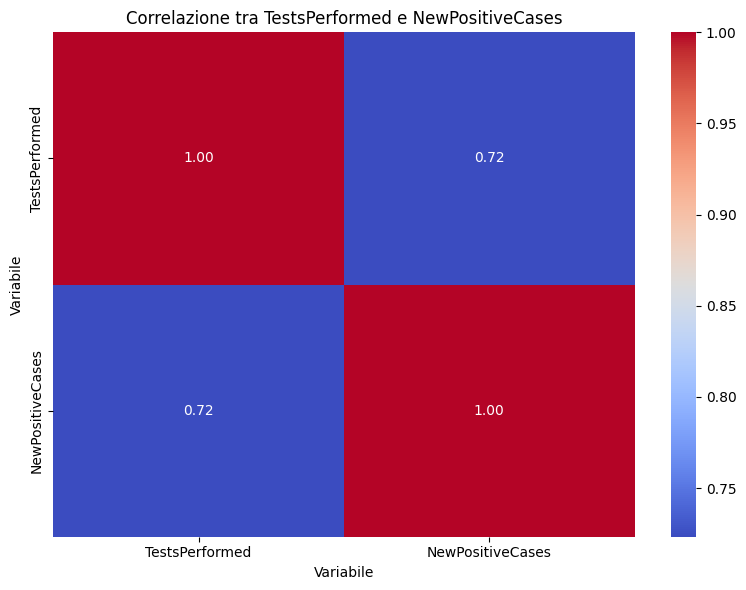

In [10]:
# C’è una correlazione tra il numero di test effettuati e il numero di nuovi casi positivi nel tempo

# Calcola la correlazione tra 'TestsPerformed' e 'NewPositiveCases'
correlation_matrix = region[['TestsPerformed', 'NewPositiveCases']].corr()

# Grafico
plt.figure(figsize=(8, 6))  # Imposta le dimensioni della figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot della matrice di correlazione con annotazioni

# Titolo e etichette degli assi
plt.title('Correlazione tra TestsPerformed e NewPositiveCases')
plt.xlabel('Variabile')
plt.ylabel('Variabile')

# Mostra il grafico
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
plt.show()